In [1]:
# import packages
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import random 
import cv2
import os
print(os.listdir("../Data/Data_split"))

['test', 'train', 'val']


In [2]:
# Define the directories for each folder with images
train_dir = "/Users/tasiabueno/Documents/Thesis/Data/Data_split/train" 
val_dir = "/Users/tasiabueno/Documents/Thesis/Data/Data_split/val" 
test_dir ="/Users/tasiabueno/Documents/Thesis/Data/Data_split/test" 
CATEGORIES = ["Negative", "Positive"] # Directory to the postive and negative images

In [3]:
# Functions to extract the data and create a clean dataframe that contains ans array with the 3-pixel values and the 
# Category of the image
def create_data(directory,data):
    for category in CATEGORIES:
        path = os.path.join(directory, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #transform the data to greyscale 
            img_array = cv2.resize(img_array, (28,28)) #resize all the images 
            data.append([img_array, class_num])  
def clean_df(data):
    df = pd.DataFrame(data)
    df = df.sample(frac = 1) 
    df = df.reset_index(drop=True)
    df.columns = ['ImageArray', 'Category']
    df["Category"] = df["Category"].replace({0:"Negative",1:"Postive"})
    return df

In [5]:
# Create clean df for train, validation and test dataset
train_data = []
val_data = []
test_data =[]
#
create_data(train_dir,train_data)
create_data(val_dir,val_data)
create_data(test_dir,test_data)
#
train_df = clean_df(train_data)
val_df = clean_df(val_data)
test_df = clean_df(test_data)

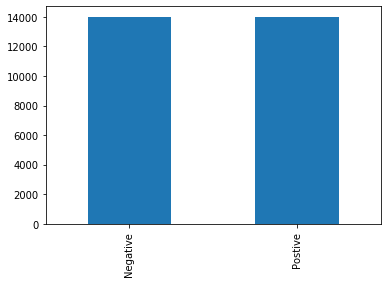

In [17]:
train_df.head()
train_df.count()
train_df["Category"].value_counts().plot.bar()

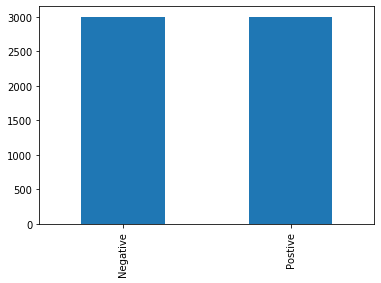

In [18]:
val_df.head()
val_df.count()
val_df["Category"].value_counts().plot.bar()

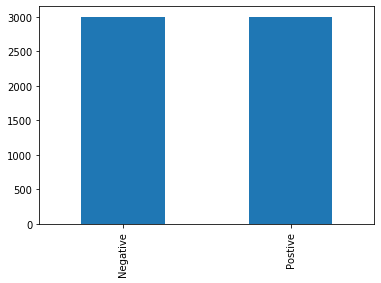

In [19]:
test_df.head()
test_df.count()
test_df["Category"].value_counts().plot.bar()

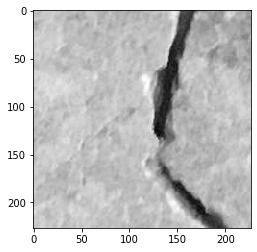

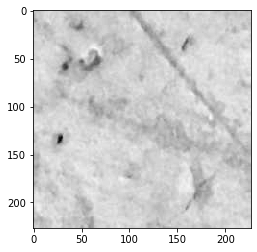

In [16]:
# Show an image of the both the classes 
for category in CATEGORIES:
    path_n = os.path.join(train_dir,CATEGORIES[0])
    path_p = os.path.join(train_dir,CATEGORIES[1])

for img in os.listdir(path_p):
        img_array_p = cv2.imread(os.path.join(path_p,img), cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array_p, cmap="gray") # Greyscale 
        plt.show()
        break   
for img in os.listdir(path_n):
        img_array_n = cv2.imread(os.path.join(path_n,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array_n, cmap="gray") # Greyscale
        plt.show()
        break

In [ ]:
# create a CNN model 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization 

model_v1 = Sequential()
model_v1.add(Conv2D(32, (3,3), activation = "relu", input_shape=(Image_W,Image_H,Image_C)))
model_v1.add(BatchNormalization())
model_v1.add(MaxPooling2D(pool_size=(2,2)))
model_v1.add(Dropout(0.25))

model_v1.add(Conv2D(64, (3, 3), activation='relu'))
model_v1.add(BatchNormalization())
model_v1.add(MaxPooling2D(pool_size=(2, 2)))
model_v1.add(Dropout(0.25))

model_v1.add(Conv2D(128, (3, 3), activation='relu'))
model_v1.add(BatchNormalization())
model_v1.add(MaxPooling2D(pool_size=(2, 2)))
model_v1.add(Dropout(0.25))

model_v1.add(Flatten())
model_v1.add(Dense(512, activation='relu'))
model_v1.add(BatchNormalization())
model_v1.add(Dropout(0.5))
model_v1.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model_v1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model_v1.summary()
